<a href="https://colab.research.google.com/github/Fabian-lewis/medical-diagnostic-pricing-audit/blob/main/exploratory_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import the Libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Load the Data
from google.colab import files

# upload file
uploaded = files.upload()

# Get File name
filename = list(uploaded.keys())[0]

# Read the file
df = pd.read_csv(filename)

# Copy data
data = df.copy()

# print data
df.head()



Saving cleaned_insurance_data.csv to cleaned_insurance_data (1).csv


,Unnamed: 0,age,sex,bmi,children,smoker,region,charges,smoker_binary,bmi_category,bmi_smoker_interaction
0,0,19,female,27.900,0,yes,southwest,16884.92400,1,Overweight,27.9
1,1,18,male,33.770,1,no,southeast,1725.55230,0,Obese,0.0
2,2,28,male,33.000,3,no,southeast,4449.46200,0,Obese,0.0
3,3,33,male,22.705,0,no,northwest,21984.47061,0,Normal,0.0
4,4,32,male,28.880,0,no,northwest,3866.85520,0,Overweight,0.0


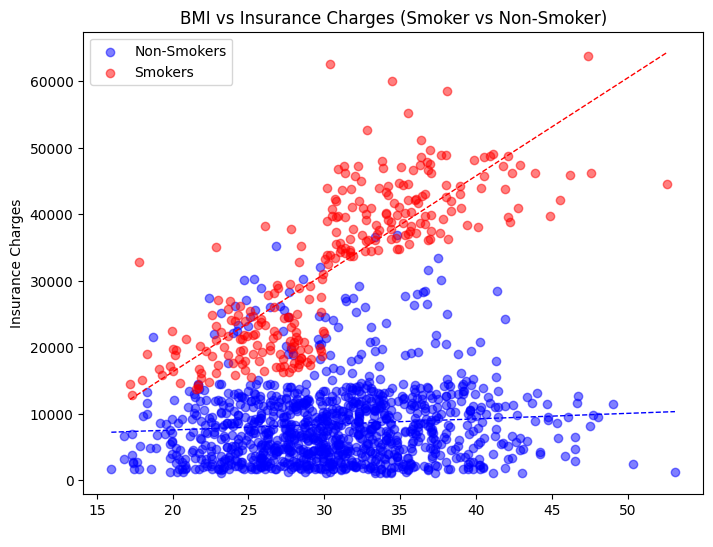

In [8]:
## Scatter Plot — BMI vs Charges (Color by Smoker)

# Split Data by smoker status
smokers = data[data['smoker_binary'] == 1]
non_smokers = data[data['smoker_binary'] == 0]

# Create the Scatter plot
plt.figure(figsize=(8,6))

plt.scatter(
    non_smokers['bmi'],
    non_smokers['charges'],
    alpha=0.5,
    label='Non-Smokers',
    color='blue'
)

plt.scatter(
    smokers['bmi'],
    smokers['charges'],
    alpha=0.5,
    label='Smokers',
    color='red'
)

# Trend lines
plt.plot(
    np.unique(non_smokers['bmi']),
    np.poly1d(np.polyfit(non_smokers['bmi'], non_smokers['charges'], 1))(np.unique(non_smokers['bmi'])),
    color='blue',
    linestyle='--',
    linewidth=1
)


plt.plot(
    np.unique(smokers['bmi']),
    np.poly1d(np.polyfit(smokers['bmi'], smokers['charges'], 1))(np.unique(smokers['bmi'])),
    color='red',
    linestyle='--',
    linewidth=1
)

plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.title('BMI vs Insurance Charges (Smoker vs Non-Smoker)')
plt.legend()
plt.show()

/tmp/ipython-input-4207690355.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=False)


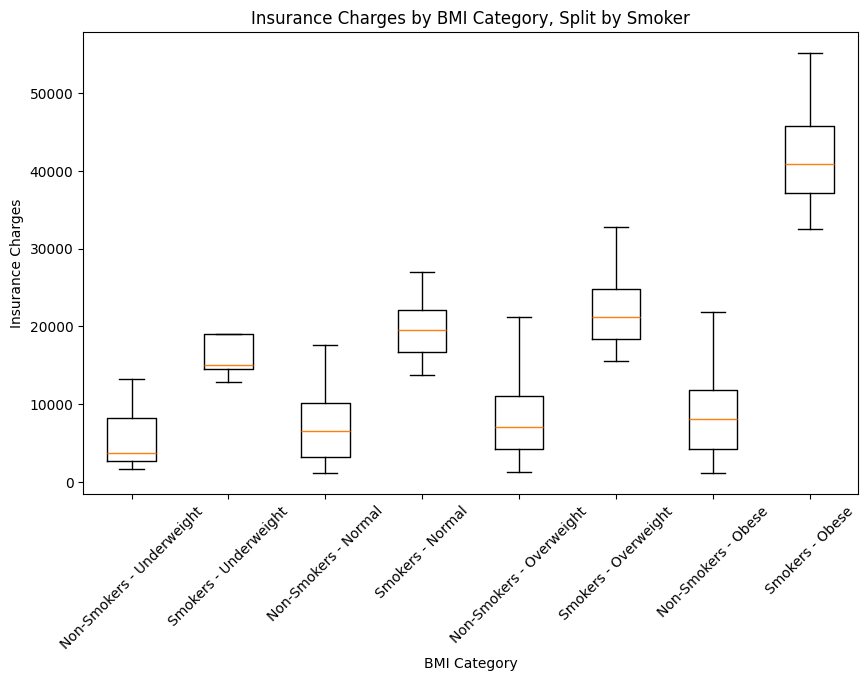

In [9]:
## Boxplots — Charges by BMI Category, Split by Smoker

# Prepare Grouped Data
groups = []
labels = []

for category in ['Underweight', 'Normal', 'Overweight', 'Obese']:
  groups.append(data[(data['bmi_category'] == category) & (data['smoker_binary'] == 0)]['charges'])
  labels.append(f'Non-Smokers - {category}')

  groups.append(data[(data['bmi_category'] == category) & (data['smoker_binary'] == 1)]['charges'])
  labels.append(f'Smokers - {category}')


plt.figure(figsize=(10,6))
plt.boxplot(groups, labels=labels, showfliers=False)
plt.xticks(rotation=45)
plt.xlabel('BMI Category')
plt.ylabel('Insurance Charges')
plt.title('Insurance Charges by BMI Category, Split by Smoker')
plt.show()

In [15]:
## Pivot Table in Python

pivot = data.pivot_table(
    values='charges',
    index='bmi_category',
    columns='smoker_binary',
    aggfunc=['mean', 'median', 'count']
)

# Order the categories
pivot = pivot.reindex(['Underweight', 'Normal', 'Overweight', 'Obese'])


pivot.columns = ['Non-Smoker Mean', 'Smoker Mean',
                 'Non-Smoker Median', 'Smoker Median',
                 'Non-Smoker Count', 'Smoker Count']


pivot

,Non-Smoker Mean,Smoker Mean,Non-Smoker Median,Smoker Median,Non-Smoker Count,Smoker Count
bmi_category,,,,,,
Underweight,5532.992453,18809.824980,3732.6251,15006.57945,15,5
Normal,7685.656014,19942.223641,6593.5083,19479.90370,175,50
Overweight,8257.961955,22495.874163,7063.9157,21215.43300,312,74
Obese,8842.691548,41557.989840,8076.0524,40904.19950,562,145
